# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Supervised Learning: Logistic Regression - Multiclass Classification

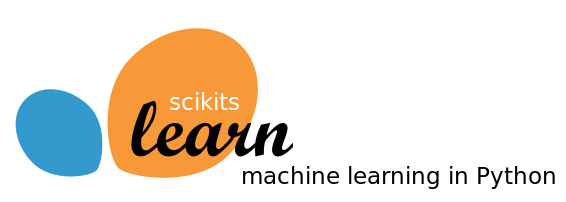

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Training Model</li>
<li> Predicting</li>
</ol>

## Learning Objectives

we are using iris flower dataset originated from UCI Iris (https://archive.ics.uci.edu/ml/datasets/iris)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant
### Background Info on Iris Flowers

#### Different species of Iris Flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

#### Dataset and Iris Attributes
![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

#### Features of Iris Dataset

 1. sepal length in cm
 2. sepal width in cm
 3. petal length in cm
 4. petal width in cm
 5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

By the end of this lab, you should be able to;
- Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

- Parse columns in the dataframe to create new dataframe columns.

- Create and interpret visualizations to explore the data set and relationships between variables
- Create a logistic regression model to iris species

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

## Loading and Cleaning data with pandas

In [2]:
iris_data = datasets.load_iris()
# Get the detail info on the dataset
# Such as: How are the data arranged, name of the column, units, missing values
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#lets check data 
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
#lets check feature names
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
#lets check target values
print(iris_data.target_names)
print(iris_data.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#lets create a dataframe containing both your features and target in one single table

#Add the features
df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

#add target variables
df['class'] = iris_data.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

## EDA

Choose any features to explore relationship with target variables.

Pairplot visualization comes handy when you want to go for Exploratory data analysis. Pairplot visualizes given data to find the relationship between them

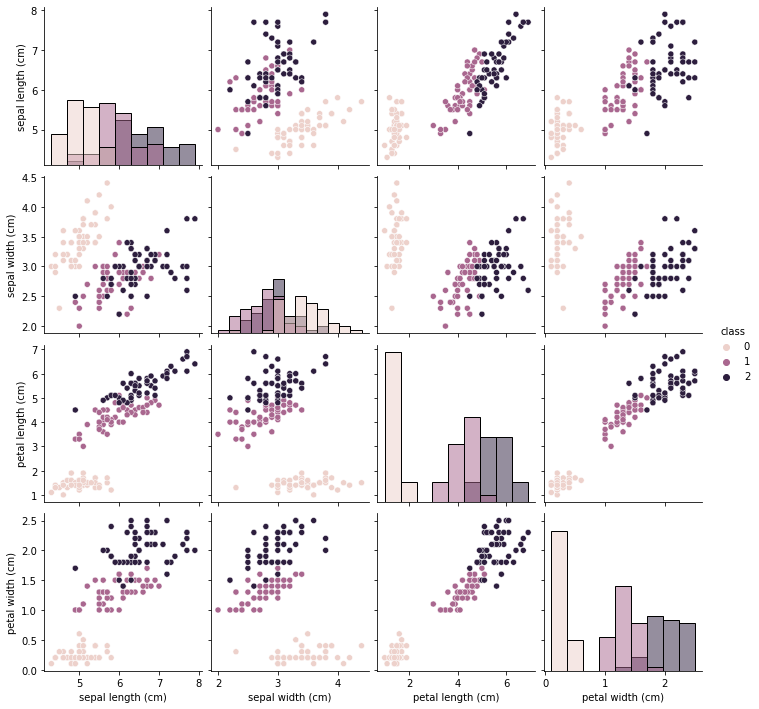

In [7]:
sns.pairplot(df,hue='class',diag_kind="hist")
plt.show()

In [8]:
#Let's do correlation plot on the data to see how the each features are co-related
# A high correlation can help us use dimension reduction
corr = df.corr() 
corr

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
class                       0.782561         -0.426658           0.949035   

                   petal width (cm)     class  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
class                      0.956547  1.000000

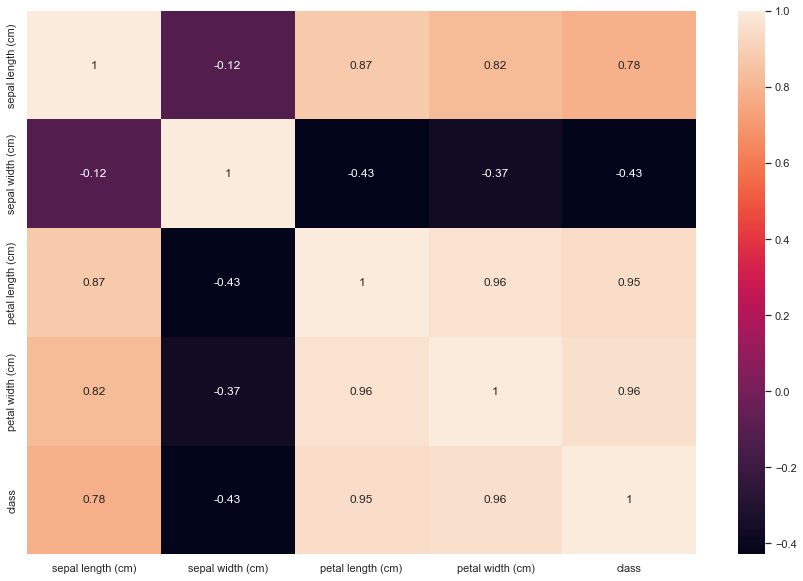

In [22]:
#visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

## Train-Test split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the `train_test_split()` function.

```sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)```

In [10]:
X, y = iris_data.data,iris_data.target

In [49]:
#use sklearn train_test_split() method to split your data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [50]:
X_test.shape

(30, 4)

In [51]:
y_test

array([0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 0, 1, 2, 0])

## Training Model

In [38]:
model = LogisticRegression()
model

LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

## Prediction

In [40]:
#make prediction for new unseen data
model.predict(X_test)

array([0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 1])

In [60]:
y_test

array([0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 0, 1, 2, 0])

In [41]:
#check probability of each class
model.predict_proba(X_test)

array([[9.84558437e-01, 1.54414361e-02, 1.27008628e-07],
       [1.88885040e-03, 4.42783726e-01, 5.55327423e-01],
       [9.73172971e-01, 2.68268575e-02, 1.71911836e-07],
       [1.56059315e-07, 8.76545410e-03, 9.91234390e-01],
       [9.85198614e-01, 1.48013252e-02, 6.05724640e-08],
       [6.67276820e-04, 4.93605645e-01, 5.05727078e-01],
       [3.36361025e-04, 1.93372930e-01, 8.06290709e-01],
       [3.20435893e-04, 3.11622849e-01, 6.88056715e-01],
       [2.00015018e-05, 5.49527655e-02, 9.45027233e-01],
       [6.61675573e-03, 8.23891325e-01, 1.69491920e-01],
       [2.71595206e-03, 8.01355102e-01, 1.95928946e-01],
       [4.27591965e-03, 6.71172395e-01, 3.24551685e-01],
       [7.95510782e-03, 9.26546150e-01, 6.54987419e-02],
       [1.46857819e-04, 1.45507893e-01, 8.54345249e-01],
       [1.62407695e-02, 8.73385292e-01, 1.10373939e-01],
       [1.13884037e-04, 1.78229495e-01, 8.21656621e-01],
       [3.47097159e-03, 7.57543144e-01, 2.38985884e-01],
       [9.68374599e-01, 3.16251

In [43]:
model.coef_

array([[-0.39891616,  0.89698342, -2.34027548, -1.00814493],
       [ 0.51058751, -0.48194789, -0.13822283, -0.80788155],
       [-0.11167136, -0.41503553,  2.47849831,  1.81602648]])

In [44]:
model.intercept_

array([  9.03696234,   2.24352049, -11.28048283])

## Model Accuracy

In [52]:
#accuracy score for training set
model.score(X_train,y_train)

0.975

In [53]:
#accuracy score for test set
model.score(X_test,y_test)

0.9333333333333333

In [58]:
#predicted value for test data
y_hat = model.predict(X_test)

In [59]:
#finding model accuracy using accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_hat)

0.9333333333333333

# THANK YOU !